# **Handwritten Digit Recognition - by using CNN & Tensorflow:**

### **Introduction:**
The Handwritten Digit Recognition project is a classic application of machine learning and computer vision that involves training a model to accurately identify handwritten digits. Handwritten digit recognition has wide-ranging applications, from automated mail sorting to digitizing historical documents. This project focuses on building a Convolutional Neural Network (CNN) to recognize and classify handwritten digits from the MNIST dataset.

### **Objective:**

The main objective of this project is to develop a robust and accurate model for recognizing handwritten digits. By training a CNN on the MNIST dataset, the project aims to achieve high accuracy in digit classification. The project also aims to showcase the capabilities of convolutional neural networks in image recognition tasks.

In [32]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
import cv2
# %matplotlib in line -- just for jupyter
# from sklearn.datasets import fetch_openml

In [155]:
# loading the MINST Dataset & splitting to X_train, y_train, X_test & y_test:

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
len(X_train)   # Checking the length of X_train.

60000

In [ ]:
len(X_test)   # Checking the length of X_test.

10000

In [ ]:
X_train.shape            # Checking shape of X_train.

(60000, 28, 28)

In [ ]:
X_test.shape    # chekcing shape of X_test.

(10000, 28, 28)

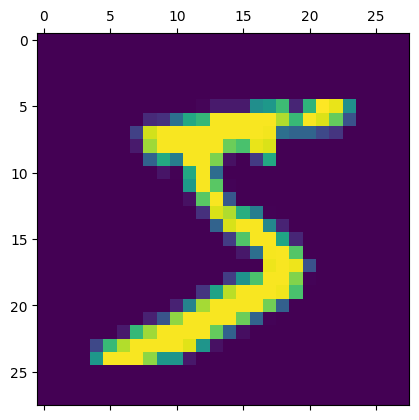

In [5]:
plt.matshow(X_train[0])     # Visualizing the value of zero index from X_train

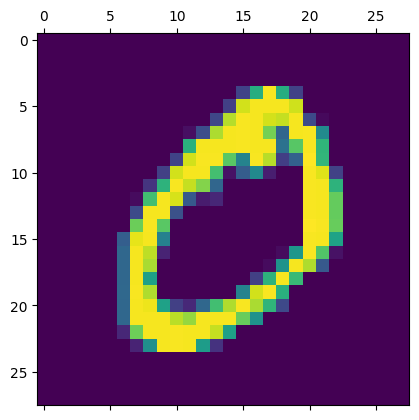

In [6]:
plt.matshow(X_train[1])       # Visualizing the value of first index from X_train.

In [12]:
y_train[:5]           # Printing first 5 values from y_train.

array([5, 0, 4, 1, 9], dtype=uint8)

In [156]:
# Feature scaling:

X_train = X_train / 255.0
X_test = X_test / 255.0

In [157]:
# Flattening X_test and X_train to build the model.

X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

In [ ]:
X_test_flattened.shape

(10000, 784)

### **Model Building Using CNN & Tensorflow:**

In [158]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

X_train_reshaped = X_train_flattened.reshape(-1, 28, 28, 1)  # Reshaping the flattened value.
X_test_reshaped = X_test_flattened.reshape(-1, 28, 28, 1)

model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [159]:
# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train_reshaped, y_train, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 31s 23ms/step - loss: 0.1566 - accuracy: 0.9522 - val_loss: 0.0652 - val_accuracy: 0.9802
Epoch 2/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0492 - accuracy: 0.9851 - val_loss: 0.0536 - val_accuracy: 0.9832
Epoch 3/10
1313/1313 [==============================] - 28s 22ms/step - loss: 0.0344 - accuracy: 0.9885 - val_loss: 0.0532 - val_accuracy: 0.9827
Epoch 4/10
1313/1313 [==============================] - 28s 22ms/step - loss: 0.0245 - accuracy: 0.9920 - val_loss: 0.0435 - val_accuracy: 0.9881
Epoch 5/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0184 - accuracy: 0.9940 - val_loss: 0.0482 - val_accuracy: 0.9869
Epoch 6/10
1313/1313 [==============================] - 28s 22ms/step - loss: 0.0143 - accuracy: 0.9952 - val_loss: 0.0442 - val_accuracy: 0.9881
Epoch 7/10
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0110 - accuracy: 0.9966 - val_loss: 0.0444 -

In [160]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test accuracy:", test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.0445 - accuracy: 0.9892
Test accuracy: 0.9891999959945679


In [16]:
# model = keras.Sequential([
#     keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
#     keras.layers.Dense(10, activation=tf.nn.softmax)
# ])

# model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

# model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2411 - accuracy: 0.7086
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5162 - accuracy: 0.8679
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3979 - accuracy: 0.8927
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3519 - accuracy: 0.9019
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3264 - accuracy: 0.9071


In [161]:
model.fit(X_test_reshaped, y_test)      # Fiting the model on X_test and y_test

313/313 [==============================] - 6s 18ms/step - loss: 0.0380 - accuracy: 0.9891


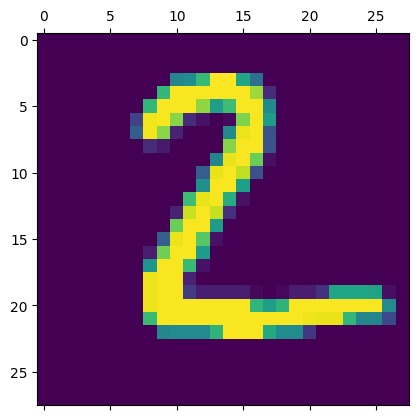

In [162]:
plt.matshow(X_test[1])      # visualizing the first index value from X_test.

In [163]:
# predicting the above value.

y_predicted = model.predict(X_test_reshaped)
y_predicted[1]

313/313 [==============================] - 2s 6ms/step


array([3.8115257e-08, 2.9846277e-08, 9.9999994e-01, 2.0791535e-10,
       3.3022782e-11, 2.8386988e-16, 2.2302658e-10, 2.9594428e-11,
       1.6693870e-12, 1.0540270e-11], dtype=float32)

In [164]:
np.argmax(y_predicted[1])     # It is predicting correct value.

2

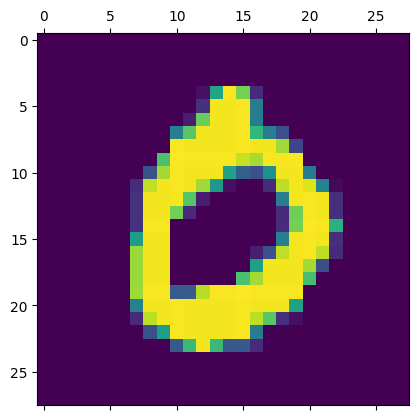

In [165]:
plt.matshow(X_test[3])           # Visualizing the 3rd indexed value from X_test.

In [166]:
np.argmax(y_predicted[3])  # as we can see, it is predicting correct value.

0

- Now we will predict y_test and will print the first 10 values.

In [167]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [168]:
# Creating confusion matrix to check predicions.

conf_mat = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted_labels)

In [169]:
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 979,    1,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1030,    1,    1,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1009,    0,    1,    0,    0,    0,    0],
       [   0,    0,    0,    0,  982,    0,    0,    0,    0,    0],
       [   0,    0,    0,    2,    0,  890,    0,    0,    0,    0],
       [   1,    1,    0,    0,    0,    0,  956,    0,    0,    0],
       [   0,    0,    3,    0,    0,    0,    0, 1025,    0,    0],
       [   0,    0,    0,    1,    0,    0,    0,    0,  973,    0],
       [   0,    0,    0,    0,    2,    0,    0,    0,    0, 1007]],
      dtype=int32)>

- We can see from the above confusion matrix, most of the values are predicting correct.

Text(95.72222222222221, 0.5, 'Actual')

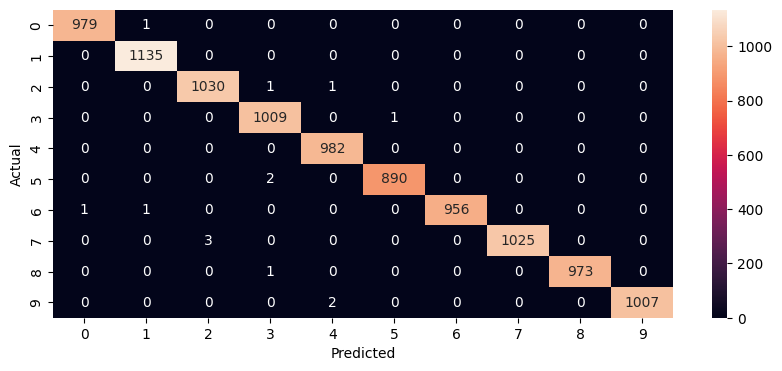

In [170]:
import seaborn as sns
plt.figure(figsize=(10,4))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

- **Now Let's check the image prediction :**

In [197]:
# Reading image by using OpenCV.

import cv2

image = cv2.imread("Digit-2.png")

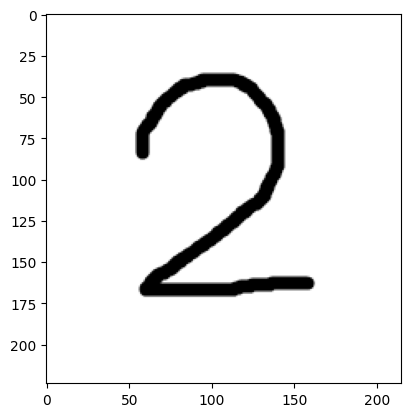

In [198]:
plt.imshow(image)   # image showing.

In [199]:
image.shape     # checking shape of image.

(224, 215, 3)

In [200]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)    # converting to gray-scale image.

In [201]:
gray_image.shape     # checking shape of gray-scale image.

(224, 215)

In [202]:
resized_image = cv2.resize(gray_image, (28, 28), interpolation = cv2.INTER_AREA)     # resizing gray-image.

In [203]:
resized_image.shape

(28, 28)

In [204]:
new_img = tf.keras.utils.normalize(resized_image, axis=1) # scaling between 0 to 1.

In [205]:
new_img_converted = np.array(new_img)    # converting to numpy array.

In [206]:
reshaped_image = new_img_converted.reshape(-1, 28, 28, 1)    # reshaping to predict.

In [207]:
reshaped_image.shape

(1, 28, 28, 1)

In [208]:
predicting_image = model.predict(reshaped_image)   # prediction the image number

1/1 [==============================] - 0s 19ms/step


In [209]:
print(np.argmax(predicting_image))    # prediction is correct

2


### **Conclusion:**
In conclusion, this project successfully demonstrates the power of Convolutional Neural Networks in recognizing handwritten digits. Through careful data preprocessing, model building, and training, the CNN achieved a commendable accuracy on the MNIST test dataset. The project highlights the significance of machine learning in real-world applications like digit recognition, where automation and accuracy are crucial. As machine learning continues to advance, projects like this contribute to the growing field of computer vision and pattern recognition.